In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as L

In [2]:
#plottly doesn't imported yet

#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls

In [3]:
#import data
train = pd.read_csv('./train.csv')
train.head()

# save the labels to a Pandas series target
target = train['label']
# Drop the label feature
train = train.drop("label",axis=1)

In [4]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = train.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

Text(0, 0.5, 'Individual Explained Variance')

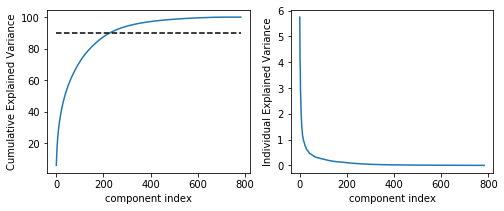

In [5]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.plot(np.arange(784), cum_var_exp)
plt.plot(np.arange(784), np.ones(784) * 90, c = 'k', linestyle = "--")
plt.xlabel("component index")
plt.ylabel("Cumulative Explained Variance")

plt.subplot(1,2,2)
plt.plot(np.arange(784), var_exp)
plt.xlabel("component index")
plt.ylabel("Individual Explained Variance")

As we can see, out of our 784 features or columns approximately 90% of the Explained Variance can be described by using just over 200 over feature
このように，データの固有ベクトルを見ることで，PCAの適切な数が凡そわかる．

In [6]:
# train.values shape : 42000 data_num * (28pix * 28pix)
train.values.shape

(42000, 784)

In [7]:
# Invoke SKlearn's PCA method
n_components = 30
pca = PCA(n_components=n_components).fit(train.values)
# Decompose train.values matrix into 42000 * 30 matrix and eigenvalues 30 * 784matrix 

eigenvalues = pca.components_.reshape(n_components, 28, 28)

# Extracting the PCA components ( eignevalues )
#eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_

In [8]:
eigenvalues.shape

(30, 784)

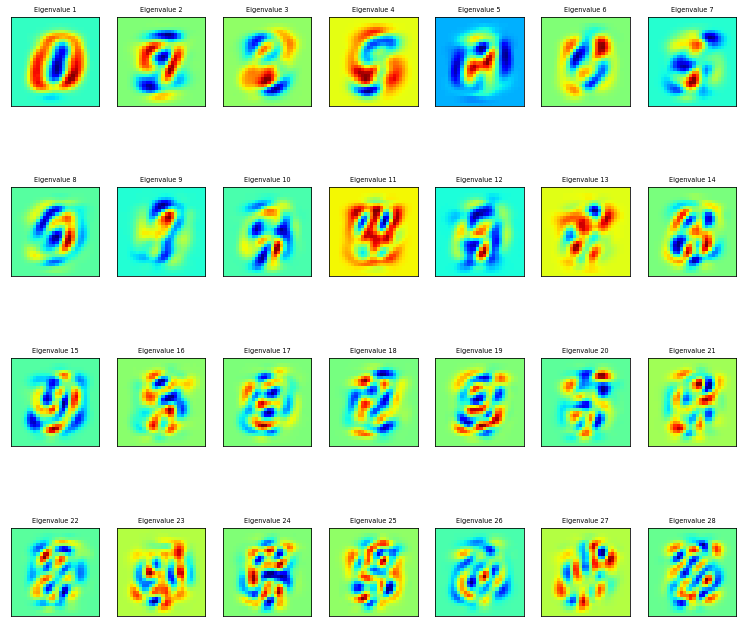

In [9]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

train.ilocって？

# ★component = 30の時の再構成の結果を描写する．

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


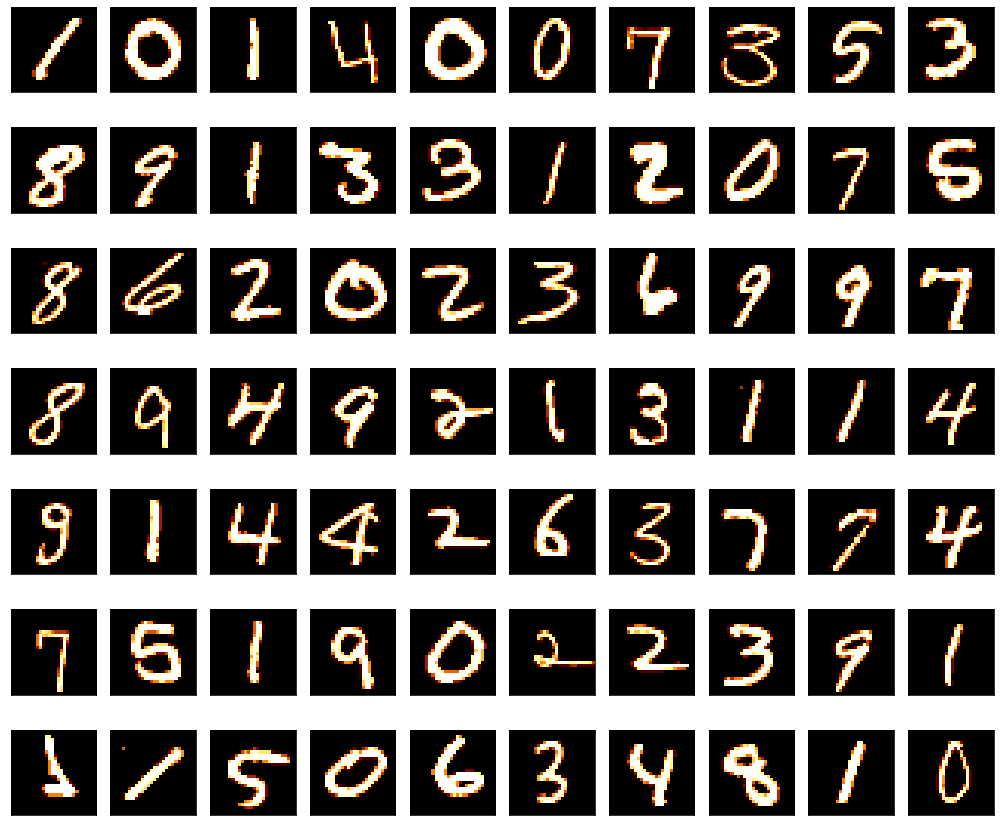

In [10]:
# これは再構成の結果ではない．
# plot some of the numbers
plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

LDA <br>
- LDAはトピックモデルの１種である．
+ k近傍法:データは一つのクラスタのみに属する
+ トピックモデル:データは複数のクラスタに属する
+ LDAはクラス間の分散を最大にして，クラス内の分散を最小にするようにして選ぶ

In [17]:
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA
from sklearn.metrics import accuracy_score 
from statistics import mean
from sklearn.model_selection import train_test_split

SIZE = 1000
np.random.RandomState(seed=0)
np.set_printoptions(suppress=True)

X_1 = pd.DataFrame(np.random.normal(loc=2, size=(SIZE, 3)), columns=['a', 'b', 'c'])
data_1 = pd.concat([X_1, pd.DataFrame(np.zeros((SIZE, 1), dtype=int), columns=['target'])], axis=1)

X_2 = pd.DataFrame(np.random.normal(loc=0, size=(SIZE, 3)), columns=['a', 'b', 'c'])
data_2 = pd.concat([X_2, pd.DataFrame(np.ones((SIZE, 1), dtype=int), columns=['target'])], axis=1)

data = pd.concat([data_1, data_2], ignore_index=True)

#データをシャッフル
data = data.sample(frac=1, random_state=0).reset_index(drop=True)


In [15]:
#XとtargetのYを分ける
X = data.drop(['target'], axis=1)
Y = data['target']

#訓練データと検証用データを0.7:0.3の割合で分ける. by sklearn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

#モデル生成 by LDA
clf = LinearDiscriminantAnalysis()
#predictするのに必要なパラメータを訓練して生成する
clf.fit(X_train, Y_train)

#テストする
predicted = clf.predict(X_test)
score = accuracy_score(predicted, Y_test)

print('Accuracy: ' + str(score))

Accuracy: 0.9583333333333334


In [31]:
# train.values shape : 42000 data_num * (28pix * 28pix)
print("train.values.shape : " + str(train.values.shape))

#X_std shape : 4200 * 784
print("X_std.shape : " + str(X_std.shape))

train.values.shape : (42000, 784)
X_std.shape : (42000, 784)


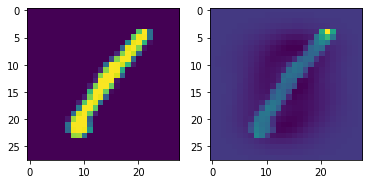

In [22]:
train_value_0 = np.reshape(train.values[0], (28,28))
X_std_0 = np.reshape(X_std[0], (28,28))
plt.subplot(1,2,1)
plt.imshow(train_value_0)
plt.subplot(1,2,2)
plt.imshow(X_std_0)

In [32]:
#To use LDA library of sklearn
from IPython.display import display, Math, Latex
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import joblib

In [26]:
lda = LatentDirichletAllocation(n_components=5, n_jobs=-1, verbose=1)

In [33]:
#次回 Todo X_stdに負の値入ってるので抜いとく
X_LDA_2D = lda.fit_transform(X_std[0:10], target.values[0:10])

ValueError: Negative values in data passed to LatentDirichletAllocation.fit

In [23]:
lda = LDA(n_components=5)
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(X_std, target.values)
## ★Targetを適切なものに変える．

NameError: name 'LDA' is not defined

In [51]:
plt.plot(X_LDA_2D[:,0], y = X_LDA_2D[:,1])
plt.xlabel("First Linear Discriminant")
plt.ylabel("Second Linear Discriminant")

NameError: name 'X_LDA_2D' is not defined

t-SNE

In [ ]:
# Invoking the t-SNE method
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_std) 

In [ ]:
plt.plot(tsne_results[:,0], tsne_results[:,1])
plt.xlabel("")
plt.ylabel("")
plt.title("TSNE (T-Distributed Stochastic Neighbour Embedding)")

調査事項 <br>
　+ train.ilocの働き
  + docker上でplotlyのimport